<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/01_CVLC_09_ResNet50(Public-0.92647%2C%20Private-0.90318).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!nvidia-smi

Fri Aug 20 11:25:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    34W / 250W |   8731MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/test.csv')

In [ ]:
!mkdir images_train
!mkdir images_train/0
!mkdir images_train/1
!mkdir images_train/2
!mkdir images_train/3
!mkdir images_train/4
!mkdir images_train/5
!mkdir images_train/6
!mkdir images_train/7
!mkdir images_train/8
!mkdir images_train/9
!mkdir images_test

In [28]:
import cv2

for idx in range(len(train)) :
    img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
    digit = train.loc[idx, 'digit']
    cv2.imwrite(f'./images_train/{digit}/{train["id"][idx]}.png', img)

In [29]:
import cv2

for idx in range(len(test)) :
    img = test.loc[idx, '0':].values.reshape(28, 28).astype(int)
    cv2.imwrite(f'./images_test/{test["id"][idx]}.png', img)

In [30]:
import tensorflow as tf
ResNet50_model =  tf.keras.applications.ResNet50(weights=None, include_top=True, input_shape=(224, 224, 1), classes=10)

In [31]:
ResNet50_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255, 
                             validation_split = 0.05,
                             rotation_range = 20,
                             width_shift_range = 0.05,
                             zoom_range = 0,
                             height_shift_range = 0.05)

train_generator = datagen.flow_from_directory('./images_train', target_size=(224,224), color_mode='grayscale', class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory('./images_train', target_size=(224,224), color_mode='grayscale', class_mode='categorical', subset='validation')

# batch size = 32 (default)
# steps_per_epoch = len('/images_train') = 1950(train_generator), 98(val_generator)
# batch size * steps_per_epoch = Total sample
# 32 * 1950 = 65,024 (train sample)
# 32 * 98 = 3,136 (validation sample)

Found 1950 images belonging to 10 classes.
Found 98 images belonging to 10 classes.


In [33]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'/content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_09_ResNet50.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [34]:
ResNet50_model.fit_generator(train_generator, epochs=500, validation_data=val_generator, callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
61/61 [==============================] - 17s 192ms/step - loss: 2.2412 - accuracy: 0.3436 - val_loss: 3.5459 - val_accuracy: 0.1020

Epoch 00001: val_accuracy improved from -inf to 0.10204, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_09_ResNet50.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/500
61/61 [==============================] - 11s 177ms/step - loss: 1.2328 - accuracy: 0.5892 - val_loss: 4.4596 - val_accuracy: 0.1020

Epoch 00002: val_accuracy did not improve from 0.10204
Epoch 3/500
61/61 [==============================] - 11s 177ms/step - loss: 0.9658 - accuracy: 0.6954 - val_loss: 4.6608 - val_accuracy: 0.1122

Epoch 00003: val_accuracy improved from 0.10204 to 0.11224, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_09_ResNet50.h5
Epoch 4/500
61/61 [==============================] - 11s 177ms/step - loss: 0.7964 - accuracy: 0.7426 - val_loss: 6.9031 - val_accuracy: 0.1020

Epoch 00004: val_accuracy did not improve from 0.11224
Epoch 5/500
61/61 [==============================] - 11s 177ms/step - loss: 0.6654 - accuracy: 0.7790 - val_loss: 7.5042 - val_accuracy: 0.1020

Epoch 00005: val_accuracy did not improve from 0.11224
Epoch 6/500
61/61 [==============================] - 11s 177ms/step - loss: 0.5924 - accuracy: 0.8149 - val_loss: 

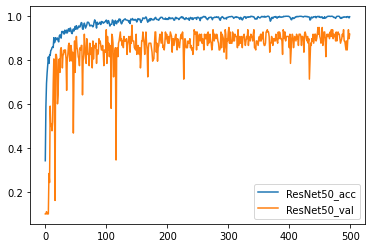

In [35]:
import matplotlib.pyplot as plt

plt.plot(ResNet50_model.history.history["accuracy"], label='ResNet50_acc')
plt.plot(ResNet50_model.history.history["val_accuracy"], label='ResNet50_val')

plt.legend()
plt.show()

In [36]:
ResNet50_model = tf.keras.models.load_model('/content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_09_ResNet50.h5', compile=False)

In [ ]:
!mkdir images_test/none
!mv images_test/*.png images_test/none

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory('./images_test', target_size=(224,224), color_mode='grayscale', class_mode='categorical', shuffle=False)

In [39]:
ResNet50_predict = ResNet50_model.predict_generator(test_generator).argmax(axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')
submission.head()

In [ ]:
import numpy as np
mylist = []

for i in range(len(submission)):
    name =  test_generator.filenames
    id = name[i].split('/')[1].rstrip('.').split('.')[0]
    mylist.append(id)
print(mylist)

In [ ]:
for i in range(len(submission)):
    submission["id"][i] = mylist[i]

In [43]:
submission["ResNet50_predict"] = ResNet50_predict
submission.head()

,id,digit,ResNet50_predict
0,10000,0,4
1,10001,0,4
2,10002,0,6
3,10003,0,9
4,10004,0,5


In [44]:
from collections import Counter

for i in range(len(submission)) :
    predicts = submission.loc[i, ['ResNet50_predict']]
    submission.at[i, "digit"] = Counter(predicts).most_common(n=1)[0][0]

submission.head()

,id,digit,ResNet50_predict
0,10000,4,4
1,10001,4,4
2,10002,6,6
3,10003,9,9
4,10004,5,5


In [ ]:
submission = submission[['id', 'digit']]
submission.head()

In [46]:
from google.colab import files

submission.to_csv('/content/drive/MyDrive/DACON_CVLC/Submission/CVLV_09_ResNet50.csv', index=False)
files.download('/content/drive/MyDrive/DACON_CVLC/Submission/CVLV_09_ResNet50.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>